In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Huts dataset

In [16]:
index = 7

In [17]:
huts = cv2.imread("./data/single_buildings/building_mask_%d.png" % index)

In [18]:
with open('./data/single_buildings/building_coords.csv') as f:
    all_coords = f.readlines()
all_coords = [x.strip().split(',')[1:] for x in all_coords]

In [19]:
coords = all_coords[index]
coords = [float(x) for x in coords]

In [20]:
coords_x = coords[0::2]

In [21]:
coords_y = coords[1::2]

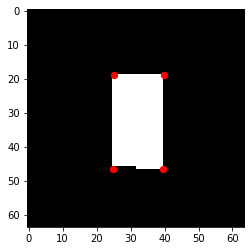

In [22]:
plt.imshow(huts)
plt.scatter(coords_x, coords_y, c = 'r', s = 40)
plt.show()

## Inira dataset

In [23]:
image = cv2.imread('./data/AerialImageDataset/train/gt/austin10.tif')

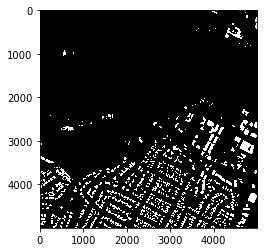

In [24]:
plt.imshow(image)
plt.show()

In [48]:
img = image
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#find Harris corners
gray = np.float32(gray)

dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.1*dst.max(),255,0)
dst = np.uint8(dst)

#find centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

#define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
#here u can get corners
print (corners)

#Now draw them
# res = np.hstack((centroids,corners)) 
# res = np.int0(res) 
# img[res[:,1],res[:,0]]=[0,0,255] 
# img[res[:,3],res[:,2]] = [0,255,0]
# cv2.imwrite('1.png',img)

[[ 2.4987590e+03  2.4929893e+03]
 [ 3.8456655e+03  2.2376941e-01]
 [ 4.0115996e+03 -7.5279802e-02]
 ...
 [ 3.7423843e+03  4.9990771e+03]
 [ 3.7783599e+03  4.9990806e+03]
 [ 3.7856497e+03  4.9987891e+03]]


In [49]:
# fig, ax = plt.subplots( nrows=1, ncols=1 )  # create figure & 1 axis
# plt.figure(figsize=(8,8))
# plt.imshow(image)
# plt.scatter(corners[1:,0],corners[1:,1], c = 'r', s = 2)
# fig.savefig('processed_corners.')   # save the figure to file
# plt.close(fig)    # close the figure

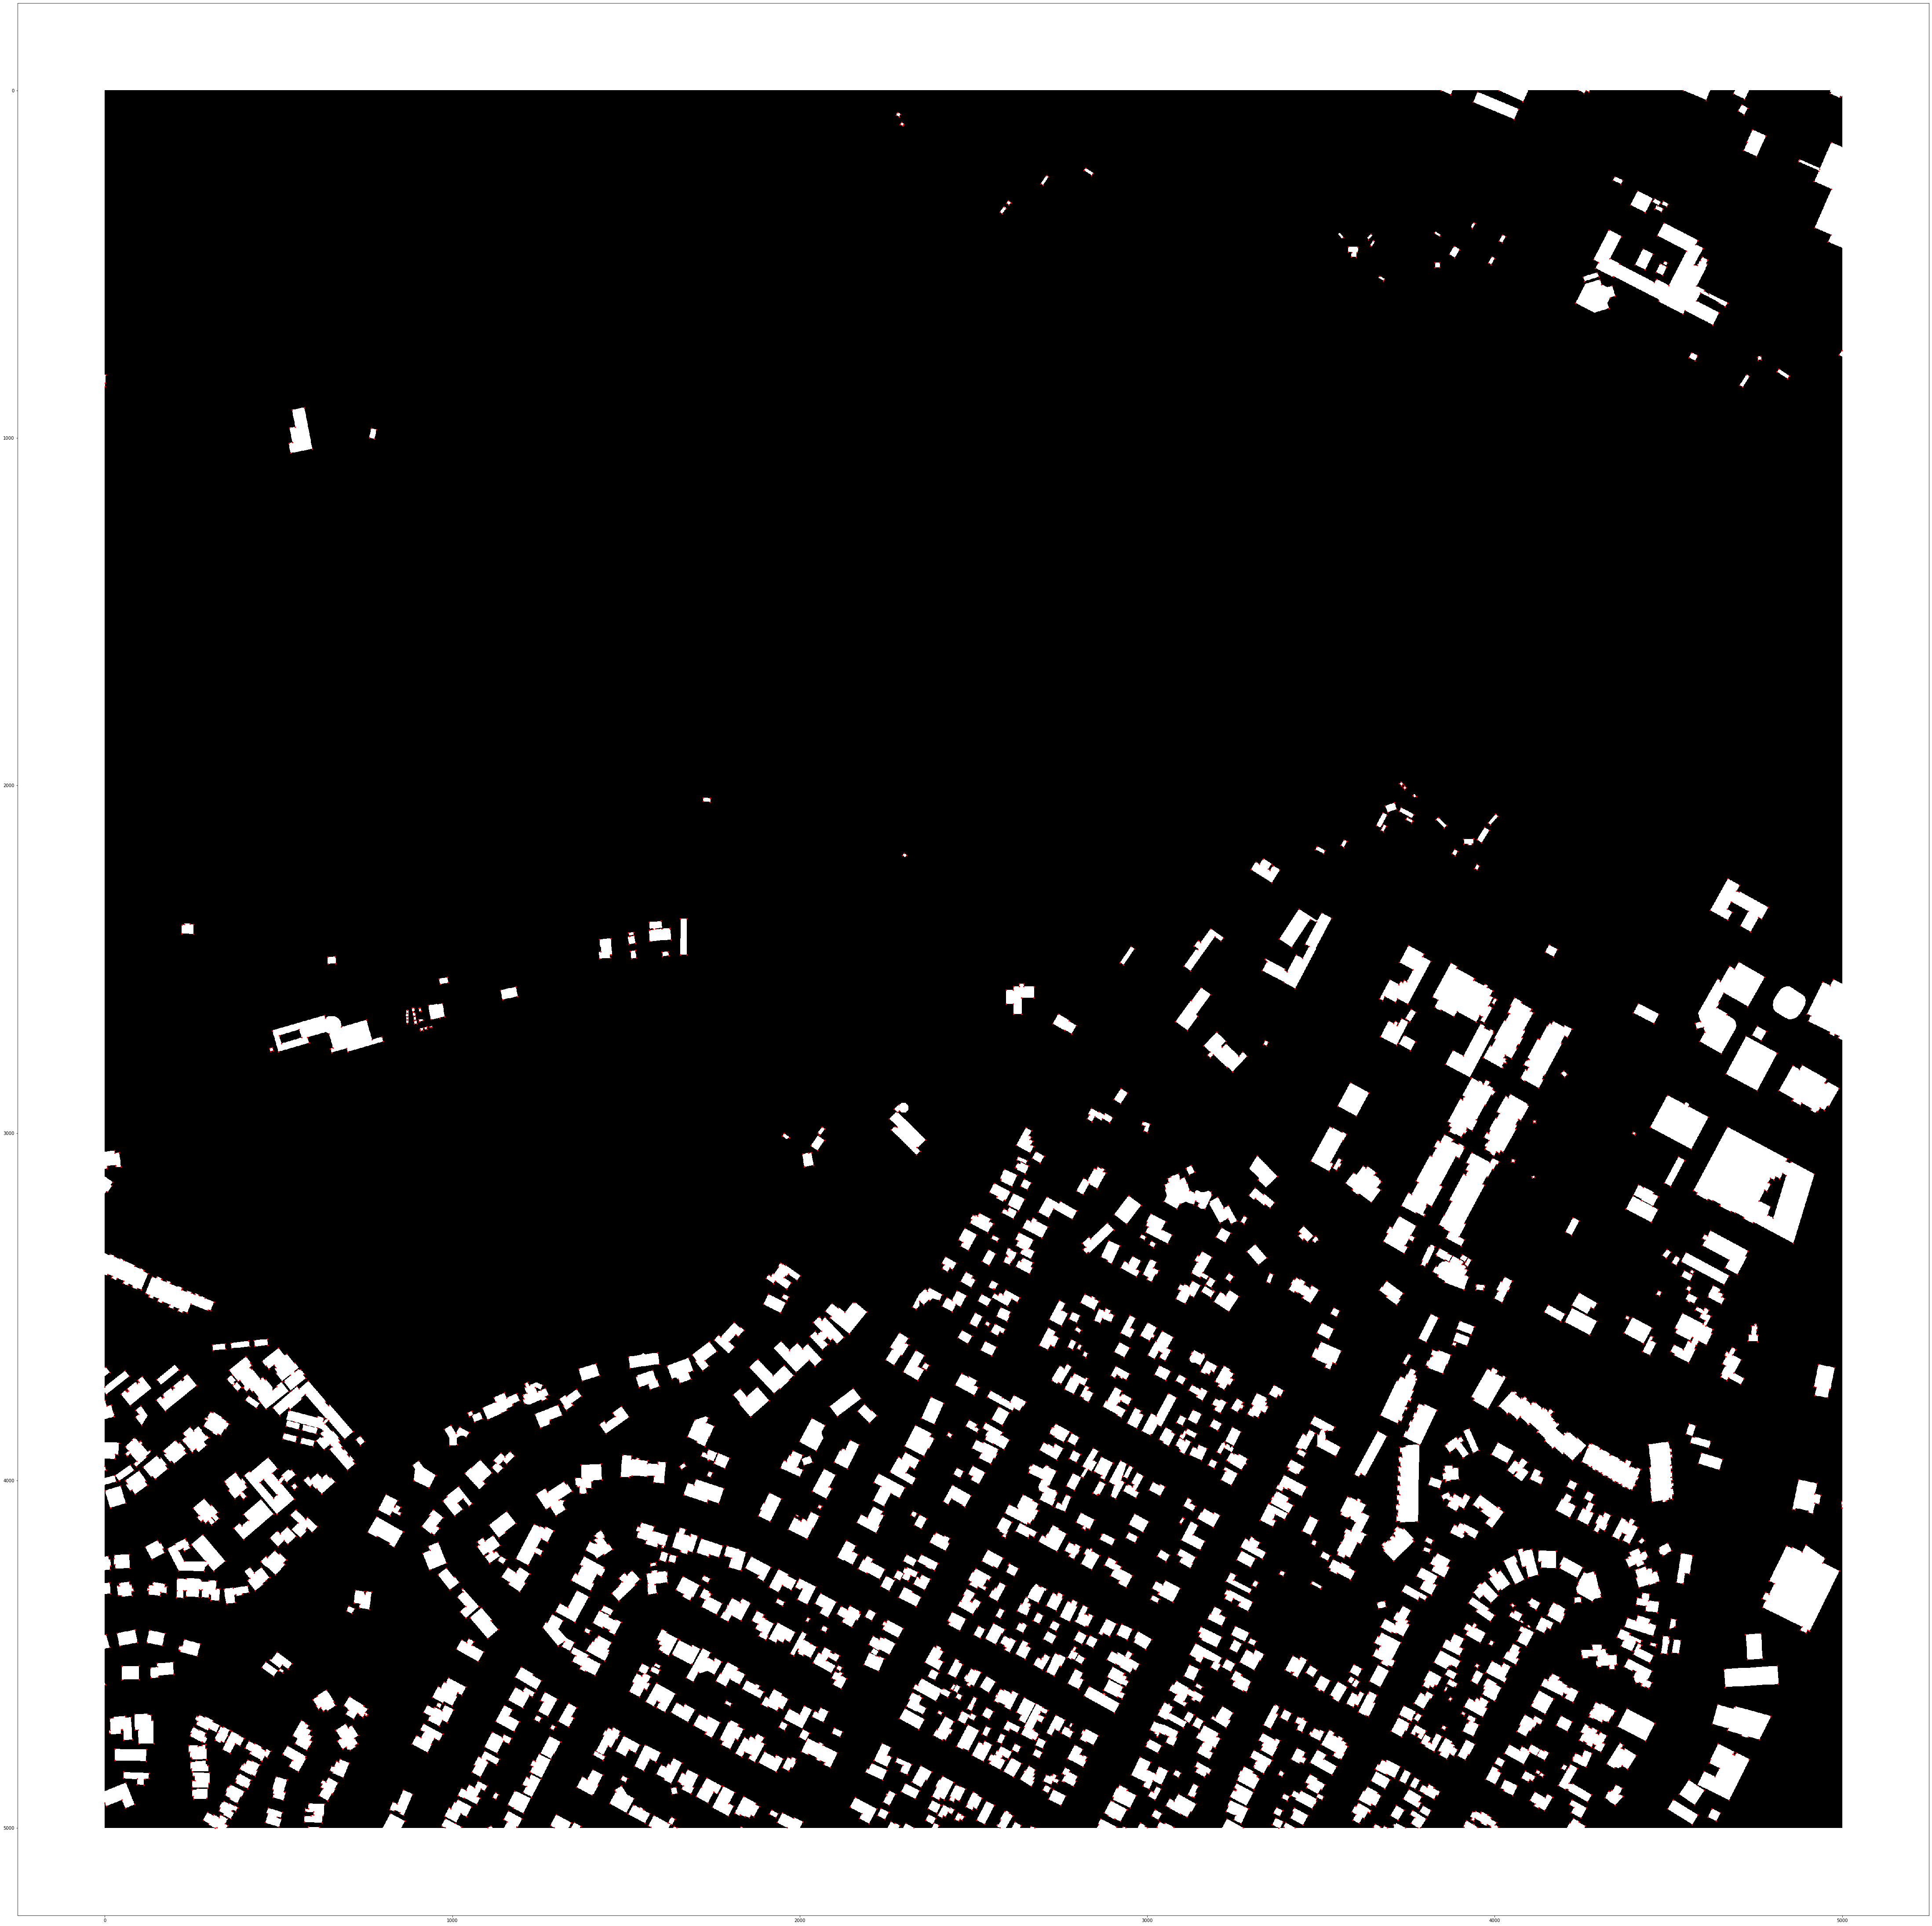

In [50]:
plt.figure(figsize=(80,80))
plt.imshow(image)
plt.scatter(corners[1:,0],corners[1:,1], c = 'r', s = 5)
plt.savefig('./processed.png')